In [15]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.types import Integer, Text, String, DateTime
import matplotlib.pyplot as plt

import datetime

In [30]:
lean_hogs = pd.read_csv("../original_data/lean_hogs.csv")
lean_hogs["Date"] = pd.to_datetime(lean_hogs["Date"])
lean_hogs.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-11-11,64.80,65.15,65.78,63.60,-,-0.50%
1,2020-11-10,65.13,66.30,66.30,64.90,24.09K,-0.72%
2,2020-11-09,65.60,65.80,66.57,65.25,25.74K,1.08%
3,2020-11-06,64.90,67.00,67.57,64.63,32.11K,-3.74%
4,2020-11-05,67.43,66.88,67.60,66.43,18.71K,1.62%


In [31]:
feeder_cattle = pd.read_csv("../original_data/feeder_cattle.csv")
feeder_cattle["Date"] = pd.to_datetime(feeder_cattle["Date"])
feeder_cattle.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-11-11,140.60,140.85,141.02,139.52,-,-0.18%
1,2020-11-10,140.85,141.30,141.95,140.20,1.10K,-0.55%
2,2020-11-09,141.63,138.30,141.88,138.30,1.83K,2.85%
3,2020-11-06,137.70,137.27,138.40,137.00,0.77K,0.09%
4,2020-11-05,137.57,137.70,138.50,136.60,0.85K,-0.09%


In [32]:
live_cattle = pd.read_csv("../original_data/live_cattle.csv")
live_cattle["Date"] = pd.to_datetime(live_cattle["Date"])
live_cattle.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-11-11,112.400,111.725,112.700,111.200,-,0.47%
1,2020-11-10,111.875,111.425,112.300,111.400,36.68K,0.04%
2,2020-11-09,111.825,109.400,111.950,109.350,45.62K,2.92%
3,2020-11-06,108.650,108.175,109.125,108.075,32.62K,0.28%
4,2020-11-05,108.350,108.675,109.000,107.825,26.05K,0.44%


In [33]:
lean_hogs["Price per unit (USD/lb)"] = lean_hogs["Price"]/(1000*float(str(lean_hogs["Vol."]).split("K")[0].split()[-1]))
feeder_cattle["Price per unit (USD/lb)"] = feeder_cattle["Price"]/(1000*float(str(feeder_cattle["Vol."]).split("K")[0].split()[-1]))
live_cattle["Price per unit (USD/lb)"] = live_cattle["Price"]/(1000*float(str(live_cattle["Vol."]).split("K")[0].split()[-1]))

lean_hogs_df = lean_hogs[["Date", "Price per unit (USD/lb)"]]
feeder_cattle_df = feeder_cattle[["Date", "Price per unit (USD/lb)"]]
live_cattle_df = live_cattle[["Date", "Price per unit (USD/lb)"]]

In [34]:
lean_hogs_df.head()

,Date,Price per unit (USD/lb)
0,2020-11-11,0.002690
1,2020-11-10,0.002704
2,2020-11-09,0.002723
3,2020-11-06,0.002694
4,2020-11-05,0.002799


In [35]:
feeder_cattle_df.head()

,Date,Price per unit (USD/lb)
0,2020-11-11,0.127818
1,2020-11-10,0.128045
2,2020-11-09,0.128755
3,2020-11-06,0.125182
4,2020-11-05,0.125064


In [36]:
live_cattle_df.head()

,Date,Price per unit (USD/lb)
0,2020-11-11,0.003064
1,2020-11-10,0.003050
2,2020-11-09,0.003049
3,2020-11-06,0.002962
4,2020-11-05,0.002954


In [37]:
str(lean_hogs["Vol."]).split("K")[0].split()[-1]

'24.09'

In [38]:
lean_hogs_df.to_csv("../output_data/csv/lean_hogs_new.csv")
feeder_cattle_df.to_csv("../output_data/csv/feeder_cattle_new.csv")
live_cattle_df.to_csv("../output_data/csv/live_cattle_new.csv")

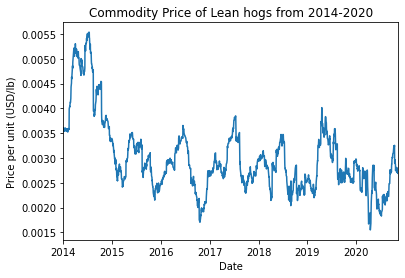

In [83]:
fig, ax = plt.subplots()

plt.plot(lean_hogs_df["Date"], lean_hogs_df["Price per unit (USD/lb)"])
ax.set_xlim([datetime.date(2014, 1, 1), datetime.date(2020, 11, 10)])
plt.xlabel("Date")
plt.ylabel("Price per unit (USD/lb)")
plt.title("Commodity Price of Lean hogs from 2014-2020")
plt.savefig("../output_data/images/lean_hogs.png")
plt.show()

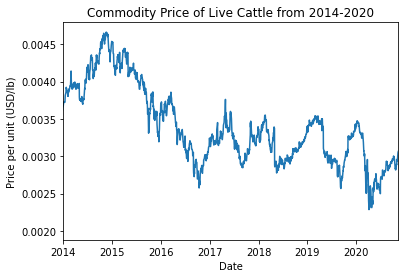

In [84]:
fig, ax = plt.subplots()
plt.plot(live_cattle_df["Date"], live_cattle_df["Price per unit (USD/lb)"])
ax.set_xlim([datetime.date(2014, 1, 1), datetime.date(2020, 11, 10)])
plt.xlabel("Date")
plt.ylabel("Price per unit (USD/lb)")
plt.title("Commodity Price of Live Cattle from 2014-2020")
plt.savefig("../output_data/images/live_cattle.png")

plt.show()

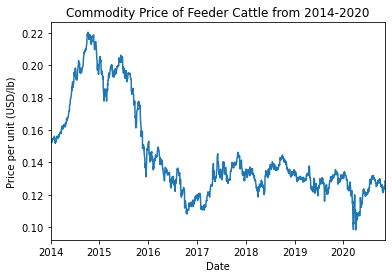

In [77]:
fig, ax = plt.subplots()
plt.plot(feeder_cattle_df["Date"], feeder_cattle_df["Price per unit (USD/lb)"])
ax.set_xlim([datetime.date(2014, 1, 1), datetime.date(2020, 11, 10)])
plt.xlabel("Date")
plt.ylabel("Price per unit (USD/lb)")
plt.title("Commodity Price of Feeder Cattle from 2014-2020")
plt.savefig("../output_data/images/feeder_cattle.png")
plt.show()

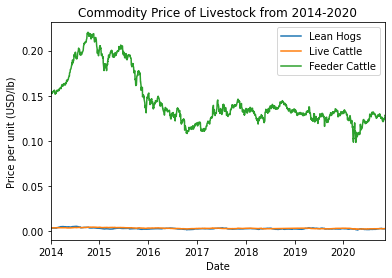

In [81]:
fig, ax = plt.subplots()
ax.set_xlim([datetime.date(2014, 1, 1), datetime.date(2020, 11, 10)])

plt.plot(lean_hogs_df["Date"], lean_hogs_df["Price per unit (USD/lb)"], label="Lean Hogs")
plt.plot(live_cattle_df["Date"], live_cattle_df["Price per unit (USD/lb)"], label="Live Cattle")
plt.plot(feeder_cattle_df["Date"], feeder_cattle_df["Price per unit (USD/lb)"], label="Feeder Cattle")
plt.xlabel("Date")
plt.ylabel("Price per unit (USD/lb)")
plt.title("Commodity Price of Livestock from 2014-2020")
plt.legend(loc="upper right")
plt.show()

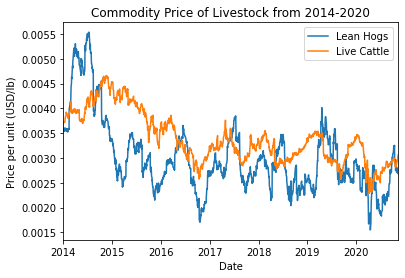

In [82]:
fig, ax = plt.subplots()
ax.set_xlim([datetime.date(2014, 1, 1), datetime.date(2020, 11, 10)])

plt.plot(lean_hogs_df["Date"], lean_hogs_df["Price per unit (USD/lb)"], label="Lean Hogs")
plt.plot(live_cattle_df["Date"], live_cattle_df["Price per unit (USD/lb)"], label="Live Cattle")
plt.xlabel("Date")
plt.ylabel("Price per unit (USD/lb)")
plt.title("Commodity Price of Livestock from 2014-2020")
plt.legend(loc="upper right")
plt.show()

In [55]:
lh_peak_value = lean_hogs_df["Price per unit (USD/lb)"].max()
lh_peak_value_date = lean_hogs_df.loc[lean_hogs_df["Price per unit (USD/lb)"] == lh_peak_value]["Date"]
summary_table = {
    "Max Value": [lh_peak_value],
    "Date": [lh_peak_value_date]
}

In [56]:
# date_time = datetime.datetime.strptime(date, "%b %d, %Y").date()
# date_time

In [57]:
sum_table = pd.DataFrame(summary_table)
sum_table

,Max Value,Date
0,0.005537,"1602 2014-07-14\nName: Date, dtype: datetime..."
